In [1]:
import numpy as np # For array operations
import matplotlib.pyplot as plt
import cv2 as cv # Mostly for showing and normalization
import os #To iterate through directories and join paths
from sklearn import preprocessing
from random import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from random import randint
import h5py
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle

In [2]:
def resize_image(img_array, height, width):
    return cv.resize(img_array, (height, width))

def plot_image(img_array):
    plt.imshow(img_array, cmap='gray')
    plt.show()

In [3]:
img_height = 120
img_width = 50
classes = ['0', '1']
class_names = ['No-Fracture', 'Fracture']

In [ ]:
!pip install unrar
!unrar x "/content/drive/MyDrive/Shared Datasets/(FR NO-FR) Dataset With Augmentation.rar"

Streaming output truncated to the last 5000 lines.
Extracting  (FR NO-FR) Dataset With Augmentation/1/3824_0611811848_01_WRI-L1_M012.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3824_0611811879_01_WRI-L2_M012.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0583833242_01_WRI-R1_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0583833277_01_WRI-R2_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0584495208_02_WRI-R1_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0584495303_02_WRI-R2_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0585354032_03_WRI-R1_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0585354062_03_WRI-R2_M013.png      76%  OK 
Extracting  (FR NO-FR) Dataset With Augmentation/1/3825_0586904286_04_WRI-R1_

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/(FR NO-FR) Dataset With Augmentation'
output_folder = '/content/fr_dataset'
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(0.7, 0.2, .1))

Copying files: 27100 files [02:29, 181.20 files/s]


In [ ]:
data_dir = '/content/fr_dataset/train'

In [4]:
# Creating training data
def get_data(data_dir, classes, img_width, img_height):
    data = []
    for a_class in classes:
        path = os.path.join(data_dir, a_class)
        class_num = classes.index(a_class)

        for image in os.listdir(path):
            img_array = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
            resized_img_array = resize_image(img_array, img_width, img_height)
            data.append([resized_img_array, class_num])
            
    return data

In [ ]:
training_data = get_data(data_dir, classes, img_width, img_height)
shuffle(training_data)

In [5]:
# Seperating features from the labels
def sep_features_labels(data):
    X = []
    y = []
    for features, label in data:
        X.append(features)
        y.append(label)
    return X, y

In [ ]:
X_train, y_train = sep_features_labels(training_data)

In [6]:
#Reshaping the features 
def reshape(X, y, img_width, img_height):
    X = np.array(X).reshape(-1, img_height, img_width, 1)
    X = np.array(X).astype('float')/255.0
    y = np.asarray(y).astype('float32').reshape((-1,1))
    
    return X, y

In [ ]:
X_train, y_train = reshape(X_train, y_train, img_width, img_height)

In [7]:
def pickle_save(x_name, y_name, X, y):
    pickle_out = open(f'{x_name}.pickle', "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()

    pickle_out = open(f'{y_name}.pickle', 'wb')
    pickle.dump(y, pickle_out)
    pickle_out.close()

def pickle_load(x_name, y_name):    
    pickle_in = open(x_name, 'rb')
    X = pickle.load(pickle_in)
    pickle_in.close()

    pickle_in = open(y_name, 'rb')
    y = pickle.load(pickle_in)
    pickle_in.close()
    return X, y

In [ ]:
pickle_save('X_train', 'y_train', X_train, y_train)

In [8]:
X_train, y_train = pickle_load('/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/X_train.pickle', '/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/y_train.pickle')

FileNotFoundError: ignored

In [ ]:
val_data = get_data(r'/content/fr_dataset/val', classes, img_width, img_height)
shuffle(val_data)
X_val, y_val = sep_features_labels(val_data)
X_val, y_val = reshape(X_val, y_val, img_width, img_height)

In [ ]:
test_data = get_data(r'/content/fr_dataset/test', classes, img_width, img_height)
shuffle(test_data)
X_test, y_test = sep_features_labels(test_data)
X_test, y_test = reshape(X_test, y_test, img_width, img_height)

In [ ]:
pickle_save('X_test', 'y_test', X_test, y_test)

In [ ]:
pickle_save('X_val', 'y_val', X_val, y_val)

In [9]:
X_test, y_test = pickle_load('/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/X_test.pickle', '/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/y_test.pickle')

In [ ]:
X_val, y_val = pickle_load('/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/X_val.pickle', '/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/y_val.pickle')

In [ ]:
training_data = []
val_data = []
test_data = []

In [ ]:
dense_layers = [0, 1]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3, 4]

models = []
histories = list(range(0, (2 * 3* 4)))
counter = 0

for dense_layer in dense_layers:
	for layer_size in layer_sizes:
		for conv_layer in conv_layers:
			NAME = f'wri-{conv_layer}-conv-{layer_size}-layer-{dense_layer}-dense-{int(time.time())}'
			tensorboard = TensorBoard(log_dir=f'/content/logs_fr_aug_binary/{NAME}')
			# %load_ext tensorboard
			# %tensorboard --logdir logs      

			print(NAME)
			model = Sequential()
			model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
			model.add(BatchNormalization())
			model.add(MaxPooling2D(pool_size=(2, 2)))

			for i in range(conv_layer - 1):
					model.add(Conv2D(layer_size, (3, 3), activation='relu'))
					model.add(MaxPooling2D(pool_size=(2, 2)))

			model.add(Flatten())
			for l in range(dense_layer):
				model.add(Dense(512, activation='relu'))
				model.add(Dropout(0.5))

			model.add(Dense(1, activation='sigmoid'))
			model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
			histories[counter] = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=132, epochs=10, callbacks=[tensorboard])
			counter += 1

			val_loss, val_acc = model.evaluate(X_val, y_val)
			train_loss, train_acc = model.evaluate(X_train, y_train)
			print(f'Val Loss: {val_loss}, Val Acc: {val_acc}')
			models.append([f'{NAME}, LOSS: {val_loss}, ACC: {val_acc}, Train_Loss: {train_loss}, Train_Acc: {train_acc}', model])

wri-1-conv-32-layer-0-dense-1664220803
Epoch 1/10
144/144 [==============================] - 13s 15ms/step - loss: 0.5447 - accuracy: 0.7340 - val_loss: 0.6487 - val_accuracy: 0.5862
Epoch 2/10
144/144 [==============================] - 2s 12ms/step - loss: 0.4163 - accuracy: 0.7919 - val_loss: 0.6063 - val_accuracy: 0.6030
Epoch 3/10
144/144 [==============================] - 2s 12ms/step - loss: 0.3695 - accuracy: 0.8215 - val_loss: 0.4942 - val_accuracy: 0.7744
Epoch 4/10
144/144 [==============================] - 2s 12ms/step - loss: 0.3458 - accuracy: 0.8377 - val_loss: 0.4520 - val_accuracy: 0.7662
Epoch 5/10
144/144 [==============================] - 2s 12ms/step - loss: 0.3211 - accuracy: 0.8522 - val_loss: 0.4561 - val_accuracy: 0.7646
Epoch 6/10
144/144 [==============================] - 2s 12ms/step - loss: 0.2962 - accuracy: 0.8661 - val_loss: 0.4755 - val_accuracy: 0.7598
Epoch 7/10
144/144 [==============================] - 2s 12ms/step - loss: 0.2743 - accuracy: 0.8813 -

In [ ]:
for index, model in enumerate(models):
  print(f'{index: } {model[0]}')

 0 wri-1-conv-32-layer-0-dense-1664220803, LOSS: 0.5532374382019043, ACC: 0.769003689289093, Train_Loss: 0.18300090730190277, Train_Acc: 0.9319978952407837
 1 wri-2-conv-32-layer-0-dense-1664220853, LOSS: 0.4179886281490326, ACC: 0.8086715936660767, Train_Loss: 0.2748391628265381, Train_Acc: 0.879599392414093
 2 wri-3-conv-32-layer-0-dense-1664220878, LOSS: 0.3912418782711029, ACC: 0.8153136372566223, Train_Loss: 0.2982330024242401, Train_Acc: 0.864997386932373
 3 wri-4-conv-32-layer-0-dense-1664220923, LOSS: 0.42661479115486145, ACC: 0.8022140264511108, Train_Loss: 0.3337646424770355, Train_Acc: 0.8371639251708984
 4 wri-1-conv-64-layer-0-dense-1664220950, LOSS: 0.6938149333000183, ACC: 0.7374538779258728, Train_Loss: 0.19134141504764557, Train_Acc: 0.9224038124084473
 5 wri-2-conv-64-layer-0-dense-1664220981, LOSS: 0.45700985193252563, ACC: 0.805535078048706, Train_Loss: 0.2095324546098709, Train_Acc: 0.9128624200820923
 6 wri-3-conv-64-layer-0-dense-1664221021, LOSS: 0.4838226139545

In [ ]:
wri_4_conv = models[15][1]

In [ ]:
history_wri_4_conv = histories[15]

In [13]:
wri_4_conv.evaluate(X_test, y_test)

85/85 [==============================] - 10s 3ms/step - loss: 0.3541 - accuracy: 0.8358


[0.3541091978549957, 0.8357933759689331]

In [ ]:
wri_4_conv.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 118, 48, 32)       320       
                                                                 
 batch_normalization_15 (Bat  (None, 118, 48, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 59, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 57, 22, 32)        9248      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 28, 11, 32)       0         
 g2D)                                                            
                                                     

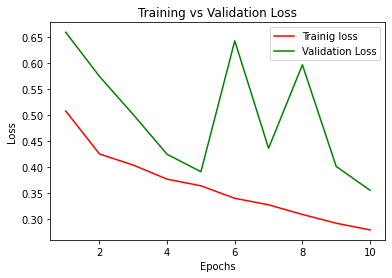

In [ ]:
loss = history_wri_4_conv.history['loss']
val_loss = history_wri_4_conv.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Trainig loss')
plt.plot(epochs, val_loss, color='green', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

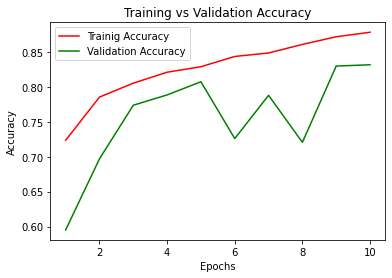

In [ ]:
acc = history_wri_4_conv.history['accuracy']
val_acc = history_wri_4_conv.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Trainig Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pickle_out = open('models.pickle', "wb")
pickle.dump(models, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('histories.pickle', "wb")
pickle.dump(histories, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/models.pickle', 'rb')
models = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
pickle_in = open('/content/drive/MyDrive/Shared Datasets/Loaded data (fr_aug_binary)/histories.pickle', 'rb')
histories = pickle.load(pickle_in)
pickle_in.close()

In [11]:
def save_model(model_name, model):
    model_json = model.to_json()
    with open(f"{model_name}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{model_name}.h5")
    print("Saved model to disk")

def load_model(model_json, model_weights, model_name):
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    conv_model = model_from_json(loaded_model_json)
    # load weights into new model
    conv_model.load_weights(model_weights)
    print("Loaded model from disk")
    return conv_model, model_name

In [ ]:
save_model('wri-4-conv-32-layer-1-dense', wri_4_conv)

Saved model to disk


In [12]:
wri_4_conv, model_name = load_model('/content/drive/MyDrive/Shared Datasets/Saved Models/fr_aug_binary_classification/wri-4-conv-32-layer-1-dense.json', 
                        '/content/drive/MyDrive/Shared Datasets/Saved Models/fr_aug_binary_classification/wri-4-conv-32-layer-1-dense.h5',
                        'wri-4-conv-32-layer-1-dense')
wri_4_conv.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

Loaded model from disk


In [15]:
y_pred = wri_4_conv.predict(X_test)

In [23]:
y_pred = [[np.where(val >= 0.5, 1, 0)] for lst in y_pred for val in lst]

In [26]:
y_pred = np.array(y_pred) 

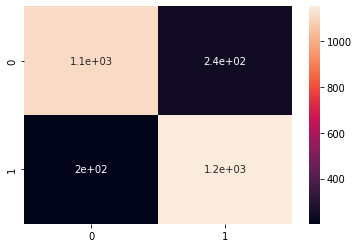

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
# 134 Page Configuration:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 50, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=132, epochs=10)

Epoch 1/10
144/144 [==============================] - 4s 22ms/step - loss: 0.5202 - accuracy: 0.7177 - val_loss: 0.6750 - val_accuracy: 0.5487
Epoch 2/10
144/144 [==============================] - 3s 20ms/step - loss: 0.4302 - accuracy: 0.7861 - val_loss: 0.5857 - val_accuracy: 0.7129
Epoch 3/10
144/144 [==============================] - 3s 20ms/step - loss: 0.4059 - accuracy: 0.8047 - val_loss: 0.5256 - val_accuracy: 0.7828
Epoch 4/10
144/144 [==============================] - 3s 20ms/step - loss: 0.3822 - accuracy: 0.8207 - val_loss: 0.4135 - val_accuracy: 0.8210
Epoch 5/10
144/144 [==============================] - 3s 20ms/step - loss: 0.3577 - accuracy: 0.8352 - val_loss: 0.3849 - val_accuracy: 0.8077
Epoch 6/10
144/144 [==============================] - 3s 20ms/step - loss: 0.3444 - accuracy: 0.8424 - val_loss: 0.3677 - val_accuracy: 0.8297
Epoch 7/10
144/144 [==============================] - 3s 20ms/step - loss: 0.3211 - accuracy: 0.8539 - val_loss: 0.3473 - val_accuracy: 0.8356

In [ ]:
model.evaluate(X_test, y_test)

85/85 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8509


[0.33167096972465515, 0.8509225249290466]

In [ ]:
model.evaluate(X_train, y_train)

593/593 [==============================] - 2s 3ms/step - loss: 0.2375 - accuracy: 0.9078


[0.23745982348918915, 0.9078018069267273]

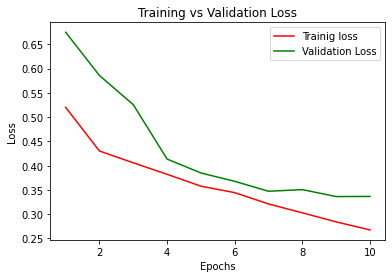

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Trainig loss')
plt.plot(epochs, val_loss, color='green', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

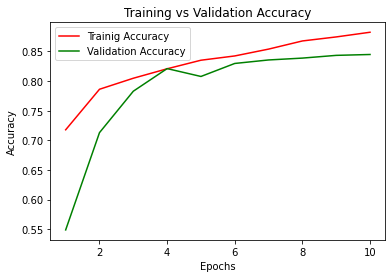

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Trainig Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
save_model('10epoch-134-config', model)

Saved model to disk


In [ ]:
model, model_name = load_model('/content/drive/MyDrive/Shared Datasets/Saved Models/fr_aug_binary_classification/134-config.json', 
                        '/content/drive/MyDrive/Shared Datasets/Saved Models/fr_aug_binary_classification/134-config.h5',
                        '134-config')
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

Loaded model from disk
